# Task 1: Student Score Prediction
## Description:
- Dataset (Recommended): Student Performance Factors (Kaggle)
- Build a model to predict students' exam scores based on their study hours
- Perform data cleaning and basic visualization to understand the dataset
- Split the dataset into training and testing sets
- Train a linear regression model to estimate final scores
- Visualize predictions and evaluate model performance
## Bonus:
- Try polynomial regression and compare performance
- Try experimenting with different feature combinations (e.g., removing or adding features like sleep, participation, etc.)

# Installing libraries & Getting the dataset

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d lainguyn123/student-performance-factors

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0%|                                               | 0.00/93.9k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 93.9k/93.9k [00:00<00:00, 143MB/s]


In [13]:
!unzip student-performance-factors.zip

Archive:  student-performance-factors.zip
  inflating: StudentPerformanceFactors.csv  


# Simple Linear Regression

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

#Loading the data
students_data = pd.read_csv('StudentPerformanceFactors.csv', delimiter=',', header='infer')

#Performing data inspection
print('Null values')
students_data.isnull().sum()

Null values


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [15]:
#Checking for duplicates
print('Duplicates')
students_data.duplicated().sum()

Duplicates


np.int64(0)

In [16]:
#Checking first rows of the data
print('First rows')
students_data.head()

First rows


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [17]:
#Checking if the data types are correct
print('Data types')
students_data.info()

Data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-

In [18]:
#Checking the summary of the basic statistics of the data
print('Summary of the stats')
students_data.describe()

Summary of the stats


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [19]:
#Performing data cleaning
#Dropping rows with null data
students_data = students_data.dropna(axis=0)
students_data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

/tmp/ipykernel_4551/1482168460.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_4551/1482168460.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


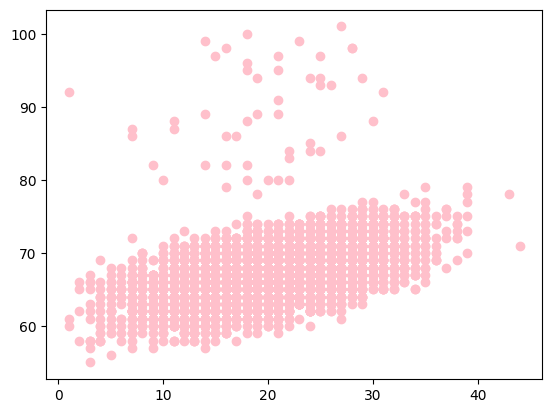

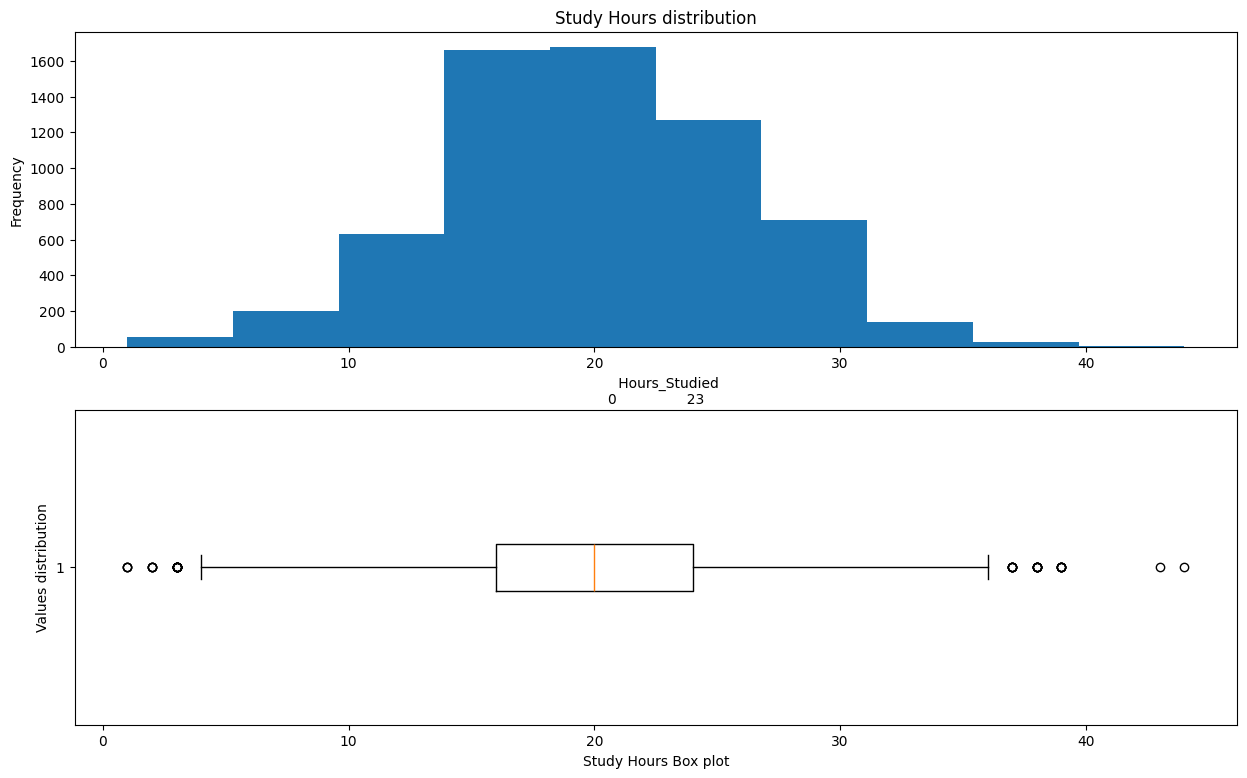

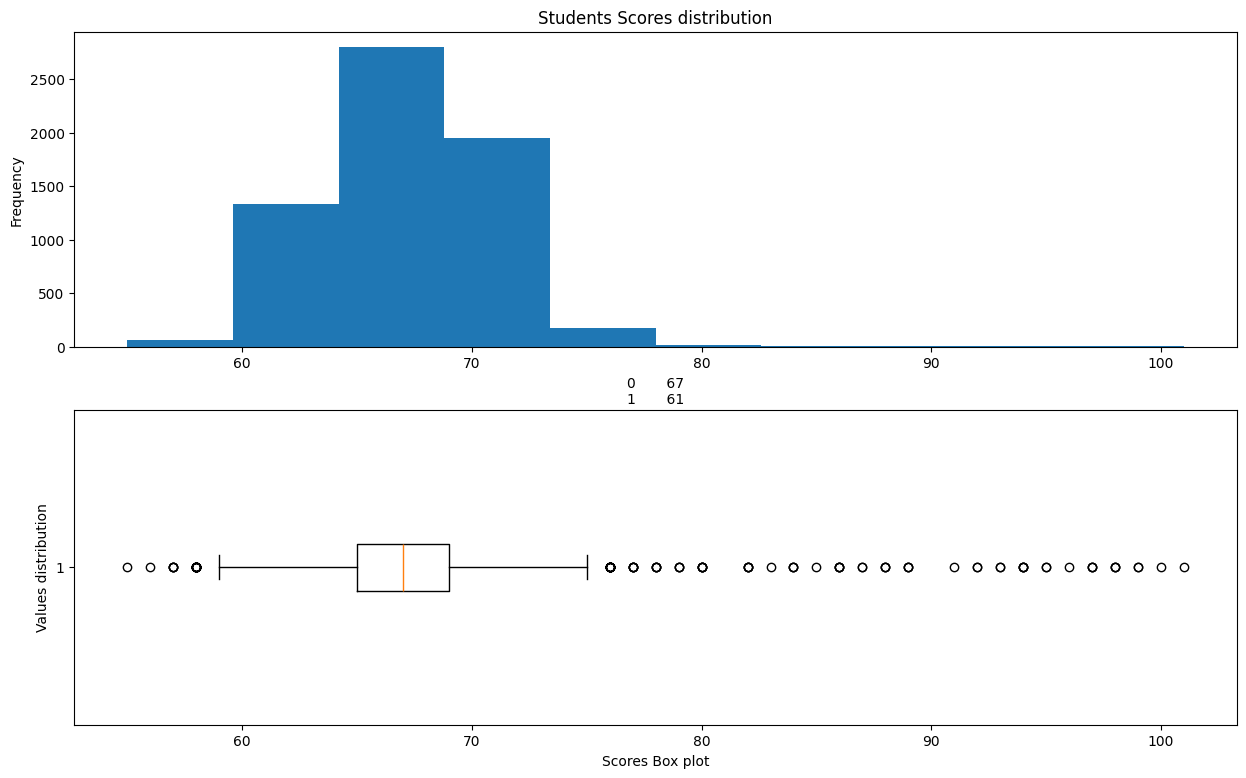

In [20]:
# Performing basic visualization to understand the data
Study_Hours = students_data[['Hours_Studied']]
Scores = students_data.Exam_Score

plt.scatter(Study_Hours, Scores, color='pink', label='Study Hours vs Exam Scores')
plt.show

fig, ax = plt.subplots(2,1, figsize=(15, 9))
ax[0].hist(Study_Hours)
ax[0].set_title('Study Hours distribution')
ax[0].set_xlabel(Study_Hours)
ax[0].set_ylabel('Frequency')

ax[1].boxplot(Study_Hours, vert=False)
ax[1].set_xlabel('Study Hours Box plot')
ax[1].set_ylabel('Values distribution')

fig.show()

fig2, ax2 = plt.subplots(2,1, figsize=(15, 9))
ax2[0].hist(Scores)
ax2[0].set_title('Students Scores distribution')
ax2[0].set_xlabel(Scores)
ax2[0].set_ylabel('Frequency')

ax2[1].boxplot(Scores, vert=False)
ax2[1].set_xlabel('Scores Box plot')
ax2[1].set_ylabel('Values distribution')

fig2.show()

In [21]:
#finding scores that are above 100
print(students_data[students_data.Exam_Score > 100])

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
1525             27          98                  Low              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
1525                        Yes            6               93   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
1525              Low              No                  5          High   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
1525            High      Public       Positive                  3   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
1525                    No              High School           Moderate   

      Gender  Exam_Score  
1525  Female         101  


In [22]:
# Dropping scores that are higher than a 100 cause they are mistakes
students_data = students_data[students_data.Exam_Score <= 100]

In [23]:
from sklearn.model_selection import train_test_split
#Splitting the data to train and test sets
X_train, X_test, y_train, y_test  = train_test_split(Study_Hours, Scores, train_size=0.8, random_state=42)

In [24]:
#Training the linear regression model on the training set
regression_model = LinearRegression()
results = regression_model.fit(X_train, y_train)

In [25]:
#Predicting the Exam scores for the test set
y_pred = regression_model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
#Evaluating the model's performance
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Root mean squared error: ', root_mean_squared_error(y_test, y_pred))
print('R square score: ', r2_score(y_test, y_pred))

Mean absolute error:  2.529242069526124
Mean squared error:  12.351733799445533
Root mean squared error:  3.5145033503249836
R square score:  0.20513060832466712


## Evaluation Results:
- MAE: 2.53 -> predictions are on average off by 2.53.
- RMSE: 3.51 -> the errors are relativaly large.
- R square: 0.20 -> the model only explains 20% of the students scores variance which suggests that study hours alone arent enough to explain the predicted variable (Exam scores) and/or the relationship between the study hours and the exam scores is not linear.

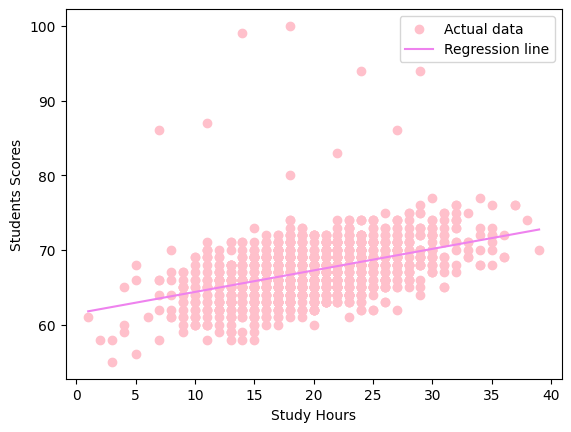

In [27]:
plt.scatter(X_test, y_test, color='pink', label="Actual data")
X_test_sorted = X_test.sort_values(by='Hours_Studied')
y_pred_sorted = regression_model.predict(X_test_sorted)
plt.plot(X_test_sorted, y_pred_sorted, color='violet', label="Regression line")
plt.xlabel("Study Hours")
plt.ylabel("Students Scores")
plt.legend()
plt.show()

# Ploynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(Study_Hours, Scores, train_size=0.8, random_state=42)

# Creating polynomial features from the study hours 
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression

# Training the polynomial regression model on the training set
poly_regression_model = LinearRegression()
poly_result = poly_regression_model.fit(X_train_poly, y_train)

In [33]:
y_pred_poly = poly_regression_model.predict(X_test_poly)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
#Evaluating the polynomial regression model's performance
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_poly))
print('Mean squared error: ', mean_squared_error(y_test, y_pred_poly))
print('Root mean squared error: ', root_mean_squared_error(y_test, y_pred_poly))
print('R square score: ', r2_score(y_test, y_pred_poly))

Mean absolute error:  2.528560941765644
Mean squared error:  12.352544212816404
Root mean squared error:  3.5146186440091056
R square score:  0.2050784559067499


## Evaluation Results:
- MAE, MSE, RMSE and R squared are all the same as simple linear regression, which suggests that study hours alone arent enough to explain the predicted variable (Exam scores).

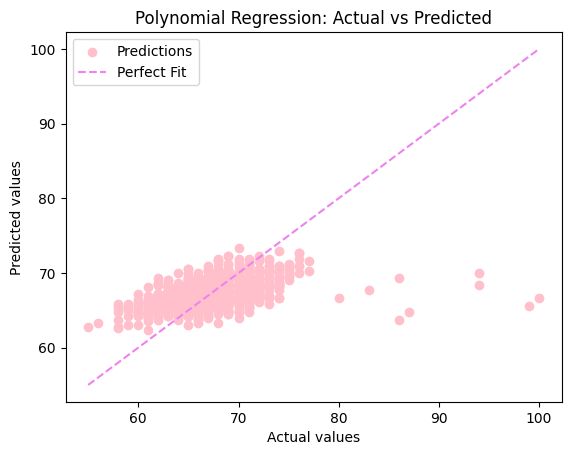

In [38]:
import numpy as np

plt.scatter(y_test, y_pred_poly, color="pink", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="violet", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.legend()
plt.show()

# Multiple Linear Regression

## Numerical data only

In [42]:
# Selecting the numerical features from the dataset as independent variables
input_columns = students_data[["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity"]]
Scores = students_data['Exam_Score']

In [43]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(input_columns, Scores, train_size=0.8, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression

# Training the multiple linear regression model on the training set
multi_regression_model = LinearRegression()
multi_result = multi_regression_model.fit(X_train, y_train)

In [45]:
# Predicting the results
y_pred_multi = multi_regression_model.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
#Evaluating the polynomial regression model's performance
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_multi))
print('Mean squared error: ', mean_squared_error(y_test, y_pred_multi))
print('Root mean squared error: ', root_mean_squared_error(y_test, y_pred_multi))
print('R square score: ', r2_score(y_test, y_pred_multi))

Mean absolute error:  1.3175220622324648
Mean squared error:  6.147868237397597
Root mean squared error:  2.479489511451419
R square score:  0.6072553768852659


## Evaluation Results:
- MAE: 1.32 -> predictions are on average off by 1.32.
- RMSE: 2.48 -> the errors are relativaly larger.
- R square: 0.61 -> the model explains 61% of the students scores variance which shows a remarkable improvement! This suggests that adding more relevant features helped in explaining the predicted variable (Exam scores) better.

## All data

In [47]:
# Choosing all the columns as independant variables
input_columns = students_data.drop('Exam_Score', axis=1)
Scores = students_data['Exam_Score']

In [49]:
# Separating numerical variables from non-numerical
numerical_features = input_columns.select_dtypes(include=['int64', 'float64']).columns
categorical_features = input_columns.select_dtypes(include=['object']).columns

In [50]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Scaling numerical data and transforming categorical features to numerical for the linear regression
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

In [51]:
from sklearn.pipeline import Pipeline

# Creating a pipeline for preprocessing the data and training the linear regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [52]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(input_columns, Scores, train_size=0.8, random_state=42)

In [53]:
# Training the multiple linear regression model on the training set
multi_result2 = model.fit(X_train, y_train)

In [54]:
# Predicting the results
y_pred_multi2 = model.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
#Evaluating the polynomial regression model's performance
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_multi2))
print('Mean squared error: ', mean_squared_error(y_test, y_pred_multi2))
print('Root mean squared error: ', root_mean_squared_error(y_test, y_pred_multi2))
print('R square score: ', r2_score(y_test, y_pred_multi2))

Mean absolute error:  0.4784070099575348
Mean squared error:  4.165547822323288
Root mean squared error:  2.040967374144743
R square score:  0.7338920669130538


## Evaluation Results:
- MAE: 0.48 -> predictions are on average off by 0.48.
- RMSE: 2.04 -> the errors are relativaly larger.
- R square: 0.73 -> the model explains 73% of the students scores variance which shows a remarkable improvement! This suggests that adding more relevant features (both the numerical and categorical) helped further in explaining the predicted variable (Exam scores) better.